In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500

MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(1, 52, size=n)
Longitude = -124 + np.random.rand(n) * 10
Latitude = 32 + np.random.rand(n) * 8
AveRooms = 5 + 0.15 * MedInc + 0.03 * HouseAge + np.random.rand(n)

target = (
    0.45 * MedInc
    - 0.02 * HouseAge
    - 0.3 * (Latitude - 36)
    - 0.1 * (Longitude - 119)
    + np.random.randn(n) * 0.5
    + AveRooms * 0.02
)

df = pd.DataFrame(
    {
        "MedInc": MedInc,
        "HouseAge": HouseAge,
        "Longitude": Longitude,
        "Latitude": Latitude,
        "AveRooms": AveRooms,
        "target": target,
    }
)

In [8]:
numeric_cols = df.columns.tolist()
cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()

print("Covariance matrix:\n", cov_mat.round(3))
print("Correlation matrix:\n", corr_mat.round(3))

Covariance matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc     22.967    -3.196      0.114     0.694     3.249  10.322
HouseAge   -3.196   222.304     -2.162    -0.080     6.056  -5.772
Longitude   0.114    -2.162      8.644     0.390    -0.037  -0.897
Latitude    0.694    -0.080      0.390     5.031     0.112  -1.284
AveRooms    3.249     6.056     -0.037     0.112     0.736   1.335
target     10.322    -5.772     -0.897    -1.284     1.335   5.572
Correlation matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.790   0.912
HouseAge   -0.045     1.000     -0.049    -0.002     0.473  -0.164
Longitude   0.008    -0.049      1.000     0.059    -0.015  -0.129
Latitude    0.065    -0.002      0.059     1.000     0.058  -0.243
AveRooms    0.790     0.473     -0.015     0.058     1.000   0.659
target      0.912    -0.164     -0.129    -0.243     0.659   1.000


In [9]:
y = df["target"].values.reshape(-1, 1)
X = df[["MedInc", "AveRooms", "HouseAge", "Latitude", "Longitude"]].values

XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ y
y_hat = X @ beta

residuals = y - y_hat

H = X @ XtX_inv @ X.T
leverage = np.diag(H)

print(leverage)

print("H", H.shape)
print("y", y.shape)
print("X", X.shape)
print("beta", beta.shape)

[0.0067846  0.00791982 0.00847013 0.0172161  0.00440733 0.00525745
 0.01259694 0.00977876 0.01533073 0.01202658 0.00705151 0.01075252
 0.00231869 0.0089819  0.00833198 0.00455737 0.00432348 0.00839827
 0.01196354 0.01361989 0.00732749 0.01285226 0.01140345 0.00569535
 0.01645572 0.0037665  0.01420947 0.00848022 0.00989076 0.0027566
 0.00841421 0.02416634 0.00878854 0.01549929 0.0140942  0.01317021
 0.00470178 0.01161905 0.01379405 0.00339667 0.00505214 0.00815537
 0.00805921 0.00793624 0.00830129 0.00969073 0.00709981 0.01711625
 0.00723452 0.01873673 0.0031081  0.00460647 0.00491858 0.00467417
 0.01330143 0.01080364 0.01133873 0.00894425 0.00300966 0.0110635
 0.00629195 0.0051693  0.00874045 0.00728413 0.00489302 0.0156464
 0.01711969 0.00577284 0.01269716 0.01077955 0.00696396 0.01324823
 0.0039508  0.01208273 0.01835672 0.01415091 0.00409896 0.00691866
 0.00999249 0.00685658 0.00994668 0.01269986 0.02038301 0.00444865
 0.0071463  0.00558483 0.0100084  0.00937241 0.00991305 0.0055030

In [10]:
summary = pd.DataFrame(
    {
        "index": np.arange(n),
        "leverage": leverage,
        "y": y.flatten(),
        "y_hat": y_hat.flatten(),
        "resid": residuals.flatten(),
    }
)

print("Top Ten Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

n_obs, p = X.shape
avg_lev = p / n_obs
treshold = 2 * avg_lev

print("avg_lev", avg_lev)
print("treshold", treshold)

Top Ten Leverage Points
     index  leverage       y   y_hat  resid
209    209     0.115  45.610  46.759 -1.149
478    478     0.052  40.237  40.086  0.152
179    179     0.034  37.909  38.264 -0.355
234    234     0.028  33.055  33.028  0.027
220    220     0.028  35.789  35.908 -0.119
113    113     0.028  36.417  35.760  0.656
323    323     0.024  33.130  33.135 -0.005
31      31     0.024  34.119  33.333  0.787
284    284     0.024  36.291  35.036  1.255
252    252     0.024  35.309  34.203  1.107
avg_lev 0.01
treshold 0.02


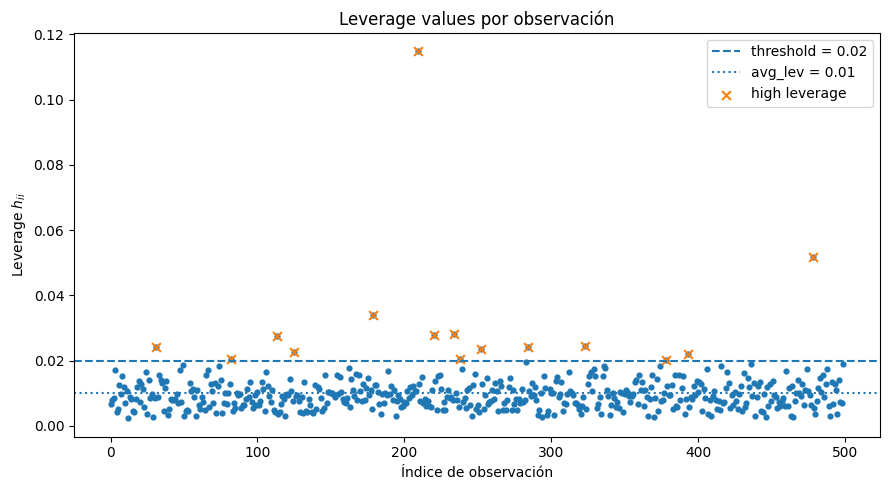

In [11]:
plt.figure(figsize=(9, 5))
plt.scatter(summary["index"], summary["leverage"], s=12, marker="o")
plt.axhline(treshold, linestyle="--", label=f"threshold = {treshold:.2f}")
plt.axhline(avg_lev, linestyle=":", label=f"avg_lev = {avg_lev:.2f}")

hi_idx = summary.index[summary["leverage"] > treshold].tolist()
if len(hi_idx) > 0:
    plt.scatter(
        hi_idx,
        summary.loc[hi_idx, "leverage"],
        s=40,
        marker="x",
        label="high leverage",
    )

plt.title("Leverage values por observación")
plt.xlabel("Índice de observación")
plt.ylabel("Leverage $h_{ii}$")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)

house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])

X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

print("Model with mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"Slope: {model.params[1]:.2f}")

Model with mansions:
Intercept: -225040.03
Slope: 114.59


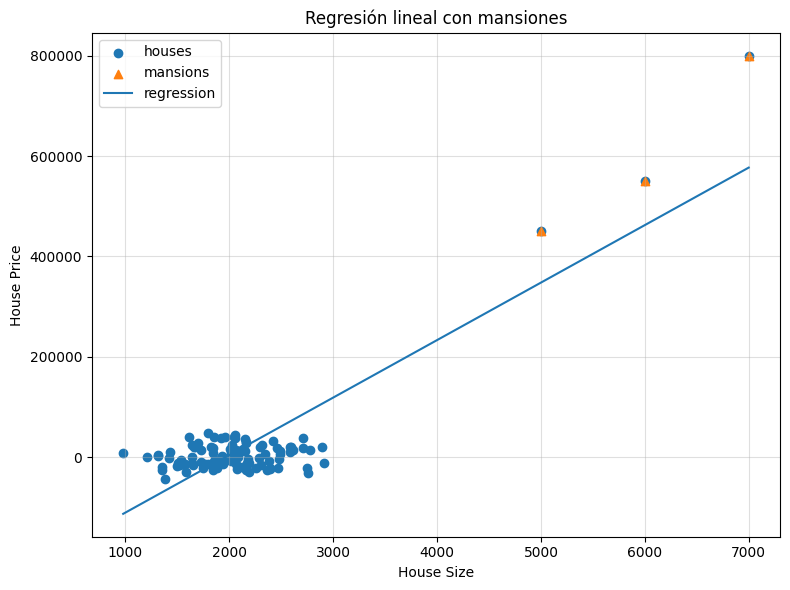

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(house_size, house_price, label="houses")
plt.scatter(house_size[-3:], house_price[-3:], label="mansions", marker="^")
plt.plot(
    np.sort(house_size),
    model.params[0] + model.params[1] * np.sort(house_size),
    label="regression",
)
plt.title("Regresión lineal con mansiones")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

In [14]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

n = len(house_size)
p = X.shape[1]
avg_lev = p / n
treshold = 2 * avg_lev

print(treshold)

0.038834951456310676


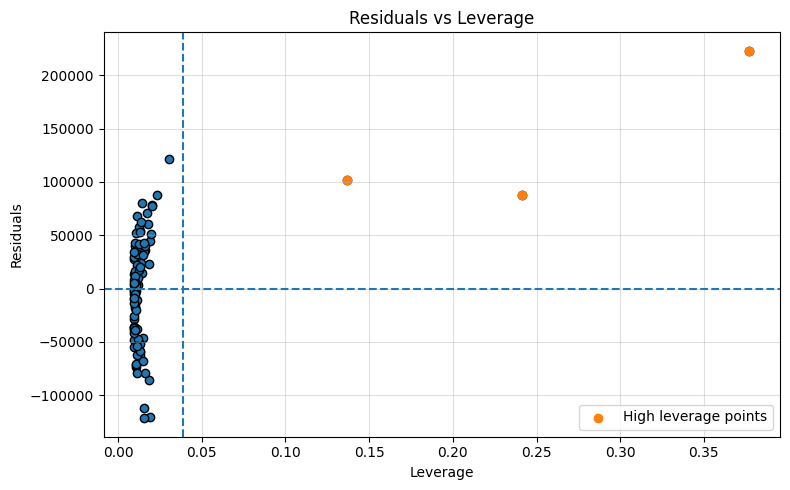

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(leverage, residuals, edgecolors="k")
plt.axhline(0, linestyle="--")
plt.axvline(treshold, linestyle="--")
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs Leverage")

high_leverage_points = np.where(leverage > treshold)[0]
plt.scatter(
    leverage[high_leverage_points],
    residuals[high_leverage_points],
    label="High leverage points",
)
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
NA antes de limpiar:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

NA después de limpiar:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD      

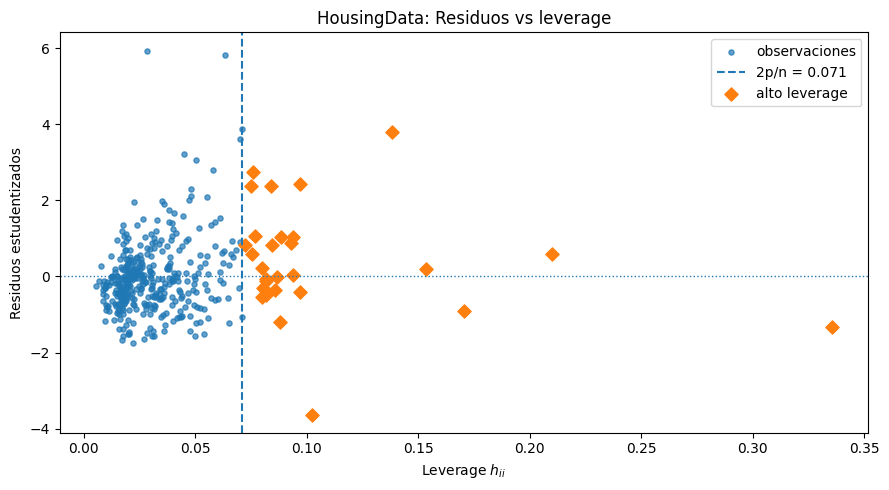


Leverages altos (HousingData):
[0.08178789 0.08004302 0.08171111 0.08186389 0.08046627 0.09692584
 0.07536709 0.07972583 0.08820423 0.09372173 0.07505316 0.09680844
 0.0760322  0.07666151 0.09373441 0.07251096 0.10213771 0.13818474
 0.33539384 0.17039236 0.1533097  0.08378495 0.20981577 0.08448735
 0.08557308 0.0931199  0.08680335 0.08861891]


In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

housing = pd.read_csv("HousingData.csv")
print(housing.head())
print("NA antes de limpiar:\n", housing.isna().sum())

housing_clean = housing.dropna().reset_index(drop=True)
print("\nNA después de limpiar:\n", housing_clean.isna().sum())

X1 = housing_clean.drop(columns="MEDV")
X1 = sm.add_constant(X1)
y1 = housing_clean["MEDV"]

model1 = sm.OLS(y1, X1).fit()

influence1 = model1.get_influence()
lev1 = influence1.hat_matrix_diag
resid1 = influence1.resid_studentized_internal

n1, p1 = X1.shape
avg_lev1 = p1 / n1
cutoff1 = 2.0 * avg_lev1

print("\navg_lev:", avg_lev1)
print("cutoff:", cutoff1)

high_lev_idx_1 = np.where(lev1 > cutoff1)[0]

plt.figure(figsize=(9, 5))
plt.scatter(lev1, resid1, s=14, alpha=0.7, label="observaciones")
plt.axvline(cutoff1, linestyle="--", label=f"2p/n = {cutoff1:.3f}")
plt.axhline(0, linestyle=":", linewidth=1)

if len(high_lev_idx_1) > 0:
    plt.scatter(
        lev1[high_lev_idx_1],
        resid1[high_lev_idx_1],
        s=45,
        marker="D",
        label="alto leverage",
    )

plt.xlabel("Leverage $h_{ii}$")
plt.ylabel("Residuos estudentizados")
plt.title("HousingData: Residuos vs leverage")
plt.legend()
plt.tight_layout()
plt.show()

print("\nLeverages altos (HousingData):")
print(lev1[high_lev_idx_1])


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
NA iniciales:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Head encoded:
    carat  depth  table  price     x     y     z  cut_Premium  cut_Very Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43        False          False   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         True          False   
2   0.23   56.9   65.0    327  4.05  4.07  2.31        False          False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         True          False   
4   0

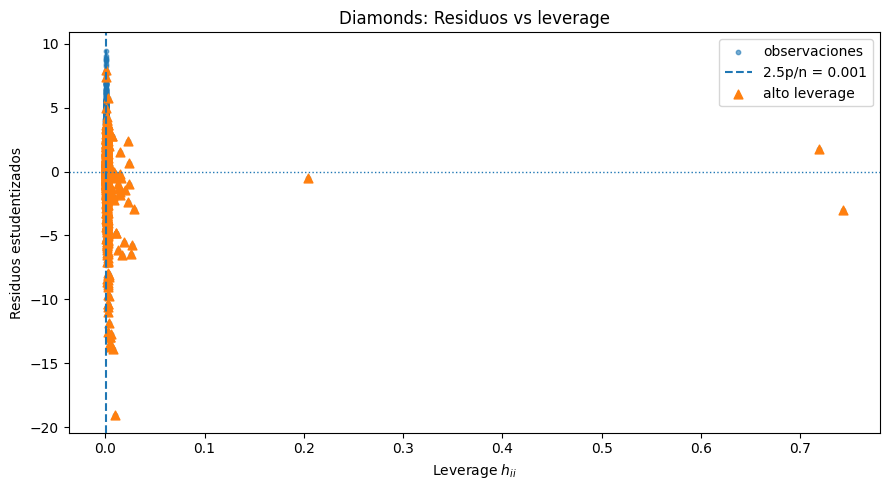


Leverages altos (Diamonds):
[0.00164357 0.00178932 0.0019226  ... 0.00137526 0.00172689 0.00187946]


In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

diamonds_raw = sns.load_dataset("diamonds")
print(diamonds_raw.head())
print("NA iniciales:\n", diamonds_raw.isna().sum())

diamonds_encoded = pd.get_dummies(
    diamonds_raw,
    columns=["cut", "color", "clarity"],
    prefix=["cut", "color", "clarity"],
    drop_first=True,
)

diamonds_encoded = diamonds_encoded.apply(pd.to_numeric, errors="coerce")
diamonds_encoded = diamonds_encoded.dropna().reset_index(drop=True)

print("\nHead encoded:\n", diamonds_encoded.head())
print("Shape encoded:", diamonds_encoded.shape)

X2 = diamonds_encoded.drop(columns="price")
X2 = sm.add_constant(X2)
y2 = diamonds_encoded["price"]

X2_arr = X2.to_numpy(dtype=float)
y2_arr = y2.to_numpy(dtype=float)

model2 = sm.OLS(y2_arr, X2_arr).fit()

influence2 = model2.get_influence()
lev2 = influence2.hat_matrix_diag
resid2 = influence2.resid_studentized_internal

n2, p2 = X2_arr.shape
avg_lev2 = p2 / n2
cutoff2 = 2.5 * avg_lev2

print("\navg_lev:", avg_lev2)
print("cutoff:", cutoff2)

high_lev_idx_2 = np.where(lev2 > cutoff2)[0]

plt.figure(figsize=(9, 5))
plt.scatter(lev2, resid2, s=10, alpha=0.6, label="observaciones")
plt.axvline(cutoff2, linestyle="--", label=f"2.5p/n = {cutoff2:.3f}")
plt.axhline(0, linestyle=":", linewidth=1)

if len(high_lev_idx_2) > 0:
    plt.scatter(
        lev2[high_lev_idx_2],
        resid2[high_lev_idx_2],
        s=40,
        marker="^",
        label="alto leverage",
    )

plt.xlabel("Leverage $h_{ii}$")
plt.ylabel("Residuos estudentizados")
plt.title("Diamonds: Residuos vs leverage")
plt.legend()
plt.tight_layout()
plt.show()

print("\nLeverages altos (Diamonds):")
print(lev2[high_lev_idx_2])